In [ ]:
import pandas as pd
Data=pd.read_csv('/content/iphone.csv')
Data.head()

productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/customer-reviews/R2HJ...   
2  https://www.amazon.in/gp/customer-reviews/R3Y7...   
3  https://www.amazon.in/gp/customer-reviews/R1P9...   
4  https://www.amazon.in/gp/customer-reviews/R1XI...   

                            reviewedIn                       variant  \
0  Reviewed in India on 11 August 2024  Colour: MidnightSize: 256 GB   
1  Reviewed in India on 16 August 2024  Colour: MidnightSize: 256 GB   
2     Reviewed in India on 14 May 2024  Colour: MidnightSize: 256 GB   
3    Reviewed in India on 24 June 2024  Colour: MidnightSize: 256 GB   
4     Reviewed in India on 18 May 2024  Colour: MidnightSize: 256 GB   

  variantAsin  
0  B09G9BQS98  
1  B09G9BQS98  
2  B09G9BQS98  
3  B09G9BQS98  
4  B09G9BQS98

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


I am going to do a three different analysis out of this data

-> Sentiment analysis: Determine overall sentiment and identify trends.

-> Feature analysis: Analyze user satisfaction with specific features.

-> Topic modeling: Discover underlying themes and discussion points.


# First Check the data and do the cleaning process

In [ ]:
Data_clean=Data.copy()
Data_clean=Data_clean[['reviewDescription','ratingScore']]
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewDescription  2976 non-null   object
 1   ratingScore        3062 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.0+ KB


In [ ]:
Data_clean['ratingScore'].value_counts()

ratingScore
5    1604
1     587
4     461
3     239
2     171
Name: count, dtype: int64

In [ ]:
A=Data_clean[Data_clean['reviewDescription'].isna()]
A

reviewDescription  ratingScore
26                 NaN            4
37                 NaN            4
72                 NaN            5
76                 NaN            4
141                NaN            5
...                ...          ...
2974               NaN            5
2984               NaN            1
2985               NaN            1
3021               NaN            5
3025               NaN            5

[86 rows x 2 columns]

In [ ]:
A=Data_clean[Data_clean['reviewDescription'].isna()]
B=A.sum()/len(A)
print(B)
A['ratingScore'].value_counts()

reviewDescription         0.0
ratingScore          4.162791
dtype: object


ratingScore
5    51
4    20
1    11
3     4
Name: count, dtype: int64

I am droping the null values it cannot be replaced or fill with any values I was droping the na


In [ ]:
Data_clean.dropna(inplace=True)
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2976 entries, 0 to 3061
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewDescription  2976 non-null   object
 1   ratingScore        2976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 69.8+ KB




> Before going into the cleaning the data lets understand more about the reviewDescription to do the focused Datacleaning




In [ ]:
# Display a sample of reviews
Data_clean['reviewDescription'].sample(10)


543                                      Best offer I got
82      I am happy to share that my personal review. i...
151     It is a great and happy feel to be a part of a...
2844    lekin battery thodi kam chalti hai baki koi pr...
2983    Mine is one and half yrs old and after update ...
2780    Camera is obviously amazing. Apart from taking...
1877    After 2 weeks the IPONE wasn’t working anymore...
1674                   Muy bien solo que no venia en caja
1920    Perfect condition! I’ll never pay full price f...
2873    Great camera , Good sound quality , super scre...
Name: reviewDescription, dtype: object


> There are lot of misspelled words are present in here and numbers is also present lets check it the number is important or not in this case and based on that lets make a desicion of keeping or droping



In [ ]:
import re
# Check if numbers are correctly extracted as strings
Data_clean['numbers_in_review'] = Data_clean['reviewDescription'].apply(lambda x: [str(num) for num in re.findall(r'\d+', x)])

# Print a sample to confirm numbers are being extracted correctly
print(Data_clean[['reviewDescription', 'numbers_in_review']].head(10))


                                   reviewDescription numbers_in_review
0  Every thing is good about iPhones, there's not...              [62]
1  It look so fabulous, I am android user switche...              [15]
2  I tried to flip camera while recording but no ...                []
3                                       100% genuine             [100]
4         Happy to get the iPhone 13 in Amazon offer              [13]
5                                           5 star 👍               [5]
6  Great Product... Nothing to say, as the Name A...             [100]
7                                    Good product 😀💯                []
8                                       Nice product                []
9                                  Excellent product                []


In [ ]:
# Combine all extracted numbers into one string
all_numbers = ' '.join([' '.join(numbers) for numbers in Data_clean['numbers_in_review'] if len(numbers) > 0])

# Check if 'all_numbers' has content
print("Combined Numbers String:", all_numbers)


Combined Numbers String: 62 15 100 13 5 100 10 7 12 13 7 120 60 66 20 1800 6 1 40 13 40 3 13 8 2 6 10 10 17000 6 1 1 5 5 2 2 1 1 24 20 100 2 13 3 4 24 12 1 13 13 12 5 13 5 21 5 13 1 2 3 4 5 1 4 30 5 1 2 3 2 2 1 2 20 80 3 4 200 17 5 16 6 60 2160 60 1 20 91 20 20 80 5 6 98 194 6 13 5 13 14 45999 7 48999 13 14 2 5 13 13 13 15 13 13 13 13 13 5 13 5 13 13 10 1 6 8 12 4 2 3 48 12 2 2 2 1 13 2023 91 100 13 128 13 68 13 6 1 15 13 13 12 4 13 15 13 15 13 128 13 8 90 13 45 000 13 13 13 128 5 5 13 128 15 13 128 1 1 13 65 128 1 2 3 4 120 120 60 5 6 2 1 7 1 5 2 3 4 5 4 6 7 8 9 10 11 16 2 1 2 1 19 1 2 3 4 1 5 6 7 8 9 13 128 13 68 13 6 1 13 13 10 1 2 3 4 1 5 6 7 8 9 13 13 6 1 15 13 13 12 15 15 13 15 13 24 13 256 13 6 1 15 13 256 12 12 13 5 15 13 5 13 68 6 30 13 256 12 12 13 11 13 11 13 13 6 7 9 30 60000 60 11 120 8 6 1 10 4 13 2020 13 4 5 5 2020 2020 13 13 13 120 50 14 13 6 7 62 7 4 13 5 13 1 5 2 3 1 2 3 4 6 22 10 10 9 10 10 10 10 10 10 10 13 12 13 1 5 14 78 7 40 97 00 22 7 13 120 60 13 13 15 13 61 00



> It seems like the numbers are not representing the features of it , it just says aboout the modela and other random stuffs so numbers are not needed in this case.



**Identify Unique Characters**

In [ ]:
# Find unique characters in the reviews
unique_chars = set(''.join(Data_clean['reviewDescription'].values))
print(unique_chars)

{'ع', 'e', '💜', 'श', '🏻', '™', '😀', 'خ', 'ª', 'ह', '„', '🥰', 'T', 'س', 'स', '‹', 'y', '£', '¬', 'i', 'ن', 's', '%', 'D', 'B', 'é', '"', 'G', 'و', 'V', '😎', '\u200d', '✅', '😡', 'ð', '”', 'ق', '~', '\x81', 'د', '😔', '्', 'र', 'भ', 'Q', '/', '🔵', 'ज', '¹', '˜', '🍎', '8', 'य', '…', '🧐', '♂', '=', '[', 'a', '—', 'ح', '6', '😍', '>', '💕', '¼', 'ب', 'अ', '😘', '•', '😥', 'ॉ', '👍', '😑', 'ك', '¢', 'थ', '☺', 'º', 'ा', '💯', '🦍', '–', '‚', 'ى', "'", 'œ', '️', 'x', '+', '‰', 'o', '✨', '#', 'ण', 'v', '❣', '🎉', '🔋', 'U', '🙌', '§', '\U0001faf6', '😻', 'í', 'L', 'M', '👏', '😁', 'ू', '1', 'ف', 'त', '¿', '💢', 'g', '&', '🙂', '📱', 'ل', 'p', 'ु', '¨', ':', '?', '🥳', '😩', '@', '¡', '*', '¾', 'ल', '♥', 'z', 'N', 'ग', '\x8f', '¥', 'c', '↓', '₹', 'ê', 'औ', '🤦', 'ي', '‘', 'W', ',', '(', 'F', '¸', ')', '،', 'á', 'O', 'ध', 'Z', 'ا', '😐', 'ج', '¤', '👎', 'ि', 'ड', 'ز', 'P', 'j', '·', 'ش', '\xad', 'ص', '\xa0', '🤣', '<', 'غ', '_', 'ء', 'l', 'u', '7', 'फ', '💥', '¯', '🙄', 'ट', 'ं', 'è', 'H', ';', '»', 'I', '🔥', 'झ', '📸', 'आ'

**Lets Analyse the Review Lengths**

In [ ]:
# Add a column with the length of each review
Data_clean['reviewLength'] = Data_clean['reviewDescription'].apply(len)

# Summary statistics of review length
print(Data_clean['reviewLength'].describe())

# Filter out very short reviews (if desired)
Data_clean = Data_clean[Data_clean['reviewLength'] > 10]


count    2976.000000
mean      202.089046
std       356.650539
min         1.000000
25%        33.000000
50%       103.000000
75%       218.250000
max      3885.000000
Name: reviewLength, dtype: float64


**Ok Now lets do the Text cleaaning task Now**

Now lets clean the Text that was in the reviewDescription

In [ ]:
Data_clean.drop(['reviewLength','numbers_in_review'], axis=1, inplace=True)
Data_clean.head()

<ipython-input-17-27434bc5ed3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_clean.drop(['reviewLength','numbers_in_review'], axis=1, inplace=True)


reviewDescription  ratingScore
0  Every thing is good about iPhones, there's not...            4
1  It look so fabulous, I am android user switche...            5
2  I tried to flip camera while recording but no ...            4
3                                       100% genuine            5
4         Happy to get the iPhone 13 in Amazon offer            5

In [ ]:
Data_clean['reviewDescription']=Data_clean['reviewDescription'].str.lower()
Data_clean.head()

reviewDescription  ratingScore
0  every thing is good about iphones, there's not...            4
1  it look so fabulous, i am android user switche...            5
2  i tried to flip camera while recording but no ...            4
3                                       100% genuine            5
4         happy to get the iphone 13 in amazon offer            5

**Remove the Punctuation**

In [ ]:
import string

# Removing punctuation
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].str.translate(str.maketrans('', '', string.punctuation))
Data_clean.head(10)

reviewDescription  ratingScore
0   every thing is good about iphones theres nothi...            4
1   it look so fabulous i am android user switched...            5
2   i tried to flip camera while recording but no ...            4
3                                         100 genuine            5
4          happy to get the iphone 13 in amazon offer            5
6   great product nothing to say as the name apple...            5
7                                     good product 😀💯            5
8                                        nice product            4
9                                   excellent product            5
10  my honest review after going broke buying this...            5

**Now replace the emoji with the actuall Meaning**

In [ ]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=5a9a13c6a57ef9ef572d8525b500f2ffe399d4bb987813f661d2a1b239f044ee
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import emoji

# Function to replace emojis with their descriptive meaning
def replace_emoji_with_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))  # Replaces emojis with descriptive text without colons

# Apply the function to the 'reviewDescription' column
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(replace_emoji_with_text)

# Display the updated DataFrame
print(Data_clean[['reviewDescription']].head(10))


                                    reviewDescription
0   every thing is good about iphones theres nothi...
1   it look so fabulous i am android user switched...
2   i tried to flip camera while recording but no ...
3                                         100 genuine
4          happy to get the iphone 13 in amazon offer
6   great product nothing to say as the name apple...
7        good product  grinning_face  hundred_points 
8                                        nice product
9                                   excellent product
10  my honest review after going broke buying this...



> As we Seen before the Numbers and lots of special Characters are there Lets Remove that



In [ ]:
import re

# Function to clean unwanted characters and keep emojis
def clean_text(text):
    # Define a pattern to remove all unwanted characters except emojis and standard alphanumeric characters
    pattern = re.compile(r'[^\w\s,!?@#&%*\-:.()]+', flags=re.UNICODE)

    # Substituting unwanted characters with an empty string
    return pattern.sub('', text)

# Apply the function to the 'reviewDescription' column
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(clean_text)

# Display the cleaned reviews
print(Data_clean['reviewDescription'].head(10))


0     every thing is good about iphones theres nothi...
1     it look so fabulous i am android user switched...
2     i tried to flip camera while recording but no ...
3                                           100 genuine
4            happy to get the iphone 13 in amazon offer
6     great product nothing to say as the name apple...
7          good product  grinning_face  hundred_points 
8                                          nice product
9                                     excellent product
10    my honest review after going broke buying this...
Name: reviewDescription, dtype: object


In [ ]:
Data_clean.head(20)

reviewDescription  ratingScore
0   every thing is good about iphones theres nothi...            4
1   it look so fabulous i am android user switched...            5
2   i tried to flip camera while recording but no ...            4
3                                         100 genuine            5
4          happy to get the iphone 13 in amazon offer            5
6   great product nothing to say as the name apple...            5
7        good product  grinning_face  hundred_points             5
8                                        nice product            4
9                                   excellent product            5
10  my honest review after going broke buying this...            5
12  its a perfect iphone i highly recommend this s...            5
13  what i like about this phone is that it is qui...            5
14  i bought the product little expensive within a...            4
15  though we talk a lot about high price for ipho...            5
16  works just fine nothing special the camera is ...            3
18  theres no same day delivery phone was delivere...            5
19  my device is not working switched offiam not a...            2
22            nothing new features only model changed            3
23  seals were teared but only stricker was put i ...            2
24  this phone has well balanced hd oled sdisplay ...            5

In [ ]:
# Function to replace underscores with spaces
def clean_descriptive_text(text):
    return text.replace('_', '')

# Apply the function to the 'reviewDescription' column
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(clean_descriptive_text)

# Display the updated DataFrame
print(Data_clean[['reviewDescription']].head(10))


                                    reviewDescription
0   every thing is good about iphones theres nothi...
1   it look so fabulous i am android user switched...
2   i tried to flip camera while recording but no ...
3                                         100 genuine
4          happy to get the iphone 13 in amazon offer
6   great product nothing to say as the name apple...
7          good product  grinningface  hundredpoints 
8                                        nice product
9                                   excellent product
10  my honest review after going broke buying this...


**Handling Contractions ---> "can't" → "cannot"**

In [ ]:
!pip install contractions==0.1.73

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import contractions

# Expanding contractions
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(lambda x: contractions.fix(x))


**Remove the URl and mentions if it was present**

In [ ]:
# Removing URLs
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Removing mentions (optional)
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(lambda x: re.sub(r'@\w+', '', x))


**Lets remove the Numbers from the Descriptions**

In [ ]:
import re

# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)  # This removes any sequence of digits

# Apply the function to the 'reviewDescription' column
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(remove_numbers)

# Display the updated DataFrame
print(Data_clean[['reviewDescription']].head(10))


                                    reviewDescription
0   every thing is good about iphones there is not...
1   it look so fabulous i am android user switched...
2   i tried to flip camera while recording but no ...
3                                             genuine
4            happy to get the iphone  in amazon offer
6   great product nothing to say as the name apple...
7          good product  grinningface  hundredpoints 
8                                        nice product
9                                   excellent product
10  my honest review after going broke buying this...


**Now lets check the words frequency before removing the stop words**

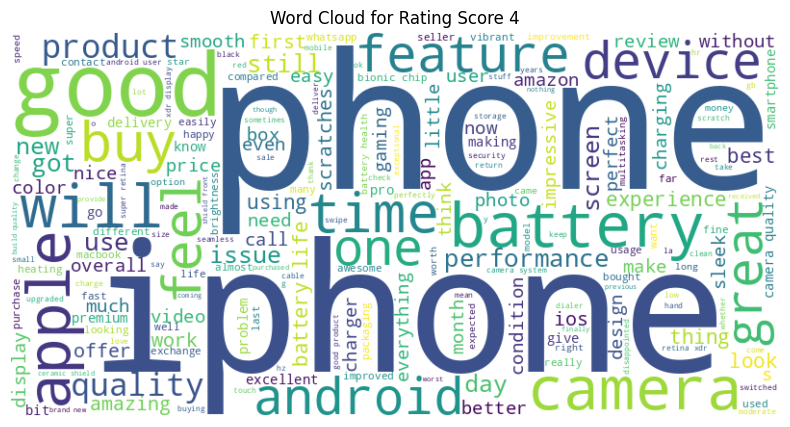

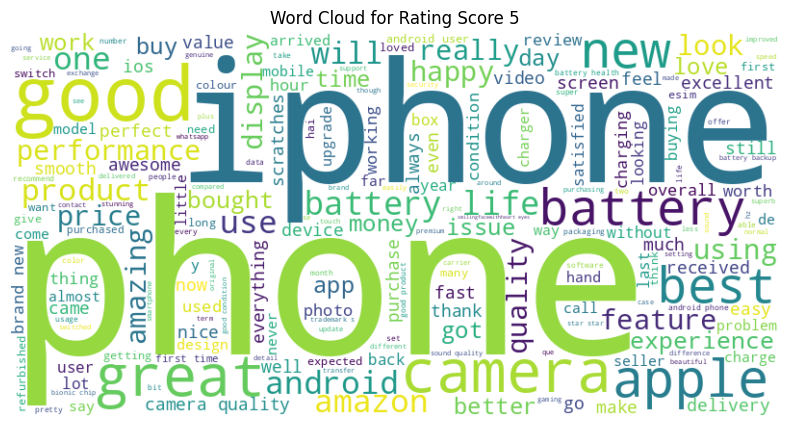

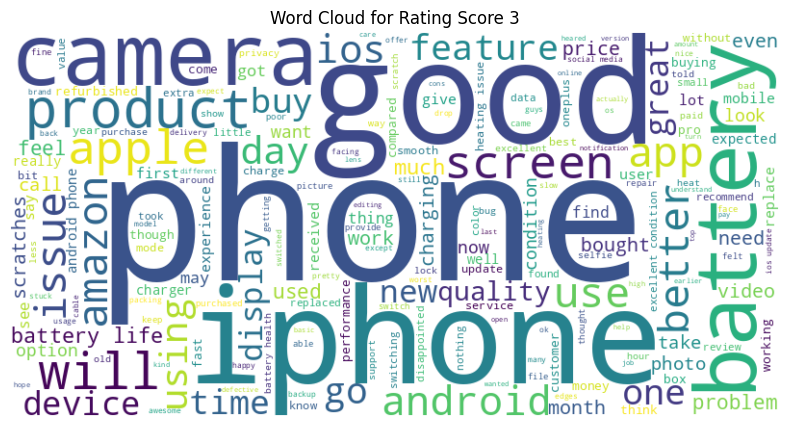

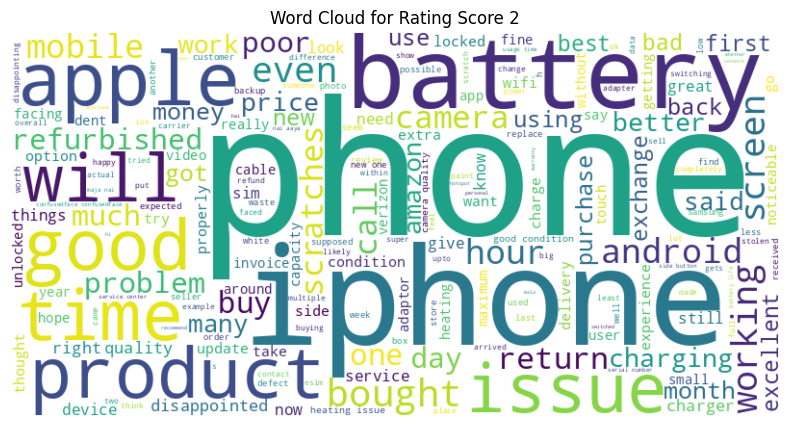

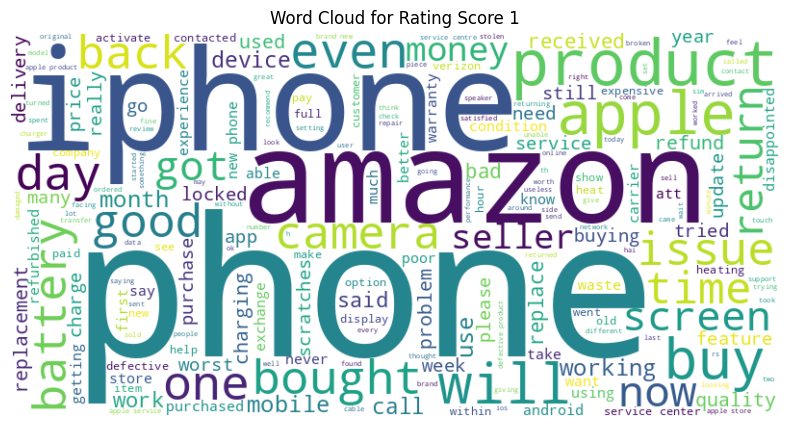

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given text
def generate_wordcloud(text, rating):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Rating Score {rating}")
    plt.show()

# Loop through each unique ratingScore value
for rating in Data_clean['ratingScore'].unique():
    # Filter the reviews for the current rating score
    reviews_for_rating = Data_clean[Data_clean['ratingScore'] == rating]['reviewDescription']

    # Combine all reviews for this rating into a single string
    all_reviews_text = ' '.join(reviews_for_rating)

    # Generate the word cloud for this class (rating)
    generate_wordcloud(all_reviews_text, rating)



> By seeing this there is not much stop words but let clean the stop word to remove the unwanted complexcity and also do the lemmetization for clear understanging and correct the gramatical mistakes in the text



**Lets Remove the StopWords**

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

stop = set(stopwords.words('english'))

# Removing stopwords
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
Data_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


reviewDescription  ratingScore
0  every thing good iphones nothing compared spee...            4
1  look fabulous android user switched apple perf...            5
2  tried flip camera recording facility added pau...            4
3                                            genuine            5
4                      happy get iphone amazon offer            5

**Now do the Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Applying lemmatization
Data_clean['reviewDescription'] = Data_clean['reviewDescription'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...





**Now Let's check the word Frequency again**

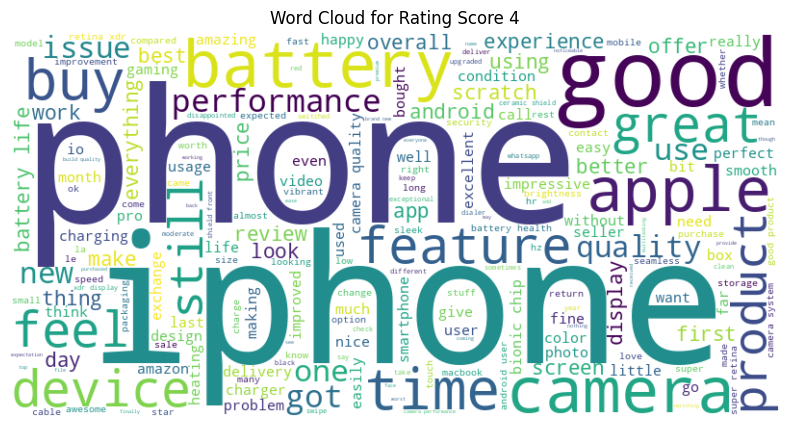

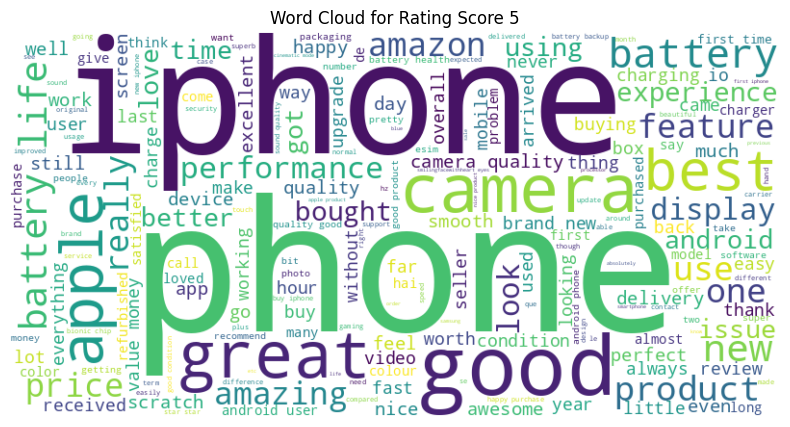

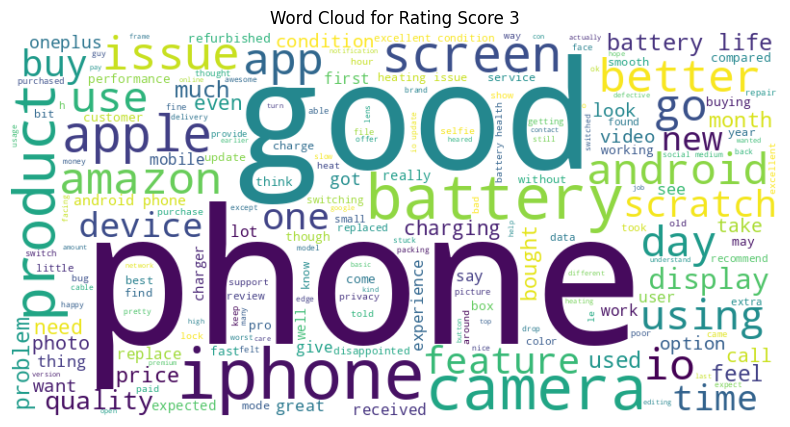

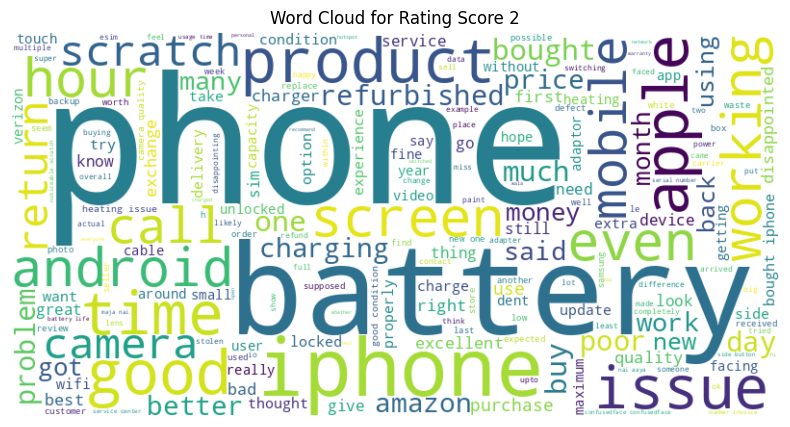

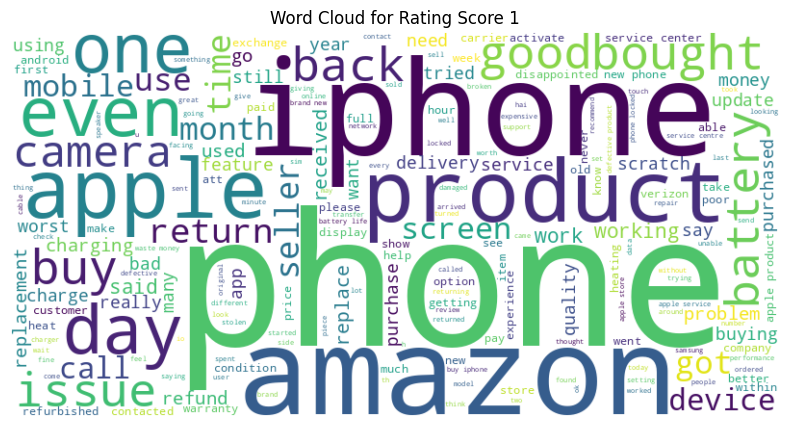

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given text
def generate_wordcloud(text, rating):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Rating Score {rating}")
    plt.show()

# Loop through each unique ratingScore value
for rating in Data_clean['ratingScore'].unique():
    # Filter the reviews for the current rating score
    reviews_for_rating = Data_clean[Data_clean['ratingScore'] == rating]['reviewDescription']

    # Combine all reviews for this rating into a single string
    all_reviews_text = ' '.join(reviews_for_rating)

    # Generate the word cloud for this class (rating)
    generate_wordcloud(all_reviews_text, rating)



> We can see in all category the iphone and phone is present in this context the review is all about the iphone,phone so it was not nesscessaryly need to present and if it present means it will lead model to difficult in generalize so I will remove that.



In [ ]:
Data_clean['reviewDescription']=Data_clean['reviewDescription'].str.replace('phone',"")
Data_clean['reviewDescription']=Data_clean['reviewDescription'].str.replace('iphone',"")
Data_clean.head()


reviewDescription  ratingScore
0  every thing good is nothing compared speed io ...            4
1  look fabulous android user switched apple perf...            5
2  tried flip camera recording facility added pau...            4
3                                            genuine            5
4                           happy get i amazon offer            5

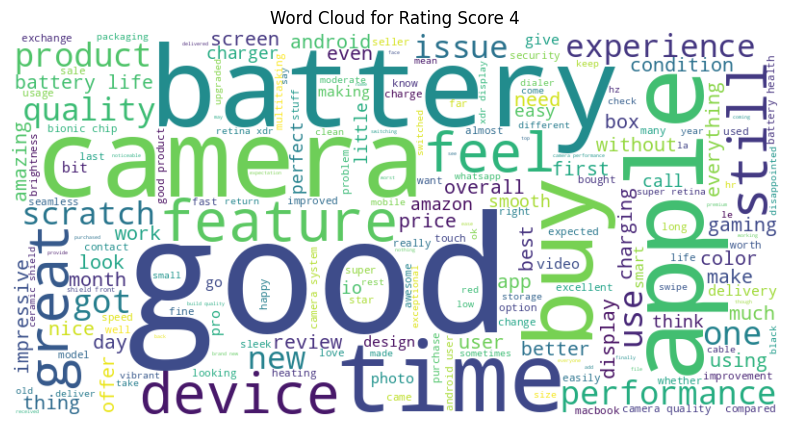

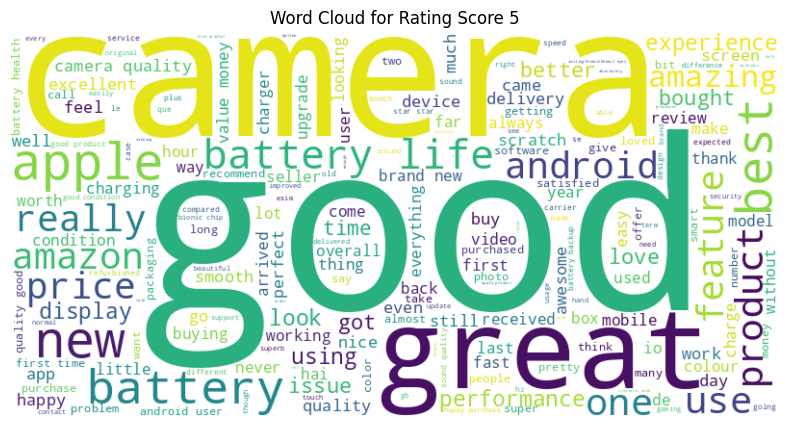

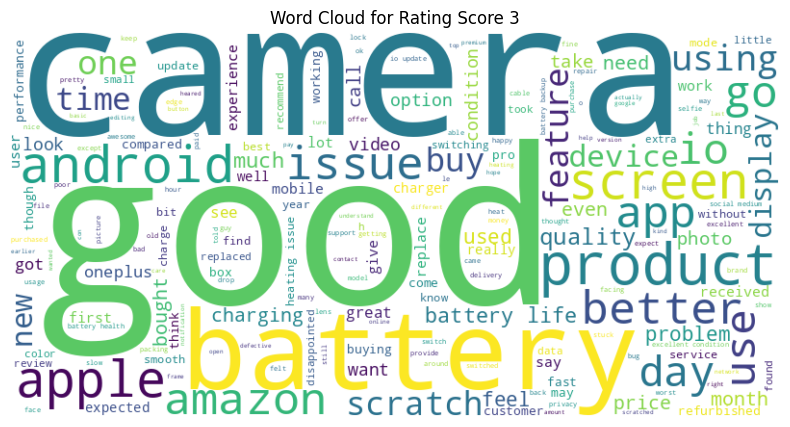

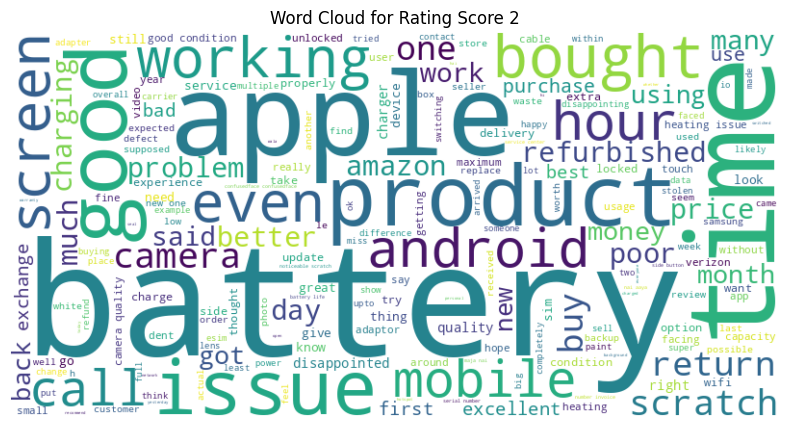

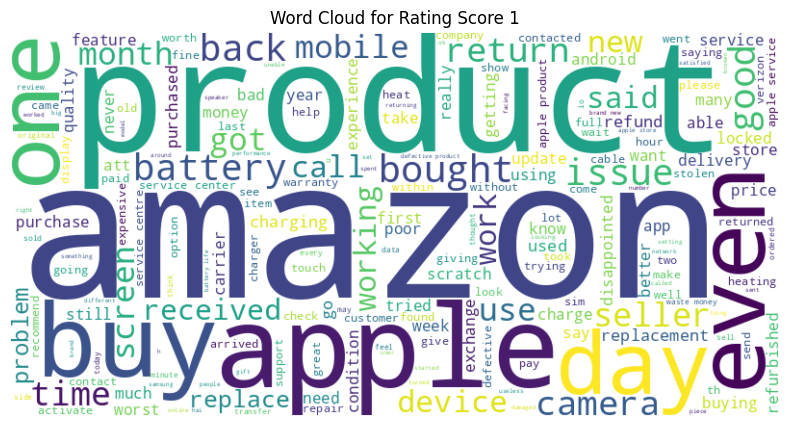

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a given text
def generate_wordcloud(text, rating):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Rating Score {rating}")
    plt.show()

# Loop through each unique ratingScore value
for rating in Data_clean['ratingScore'].unique():
    # Filter the reviews for the current rating score
    reviews_for_rating = Data_clean[Data_clean['ratingScore'] == rating]['reviewDescription']

    # Combine all reviews for this rating into a single string
    all_reviews_text = ' '.join(reviews_for_rating)

    # Generate the word cloud for this class (rating)
    generate_wordcloud(all_reviews_text, rating)



> Now its good and the model won't relay on the one single word



In [ ]:
Data_clean['ratingScore'].value_counts()

ratingScore
5    1364
1     562
4     392
3     223
2     165
Name: count, dtype: int64



> In this data the Target class are not evenly or equally distributed one thing > I can do to extablish slight balance in across all the class is grouping the > similar category class to gether

> For example -

> the Class 1 and 2 are grouped as 1 - Poor
> the Class 3 and 4 are grouped as 2 - Good
> the Class 5 as 3 - Excellent

**By doing this the class imbalance might be avoided and the equal importance will be achieved**



In [ ]:
#change the all ratingscore within the 1 to 3 poor to Excellent
Data_clean.loc[(Data_clean['ratingScore'] == 1) | (Data_clean['ratingScore'] == 2), 'ratingScore'] = 1
Data_clean.loc[(Data_clean['ratingScore'] == 3) | (Data_clean['ratingScore'] == 4), 'ratingScore'] = 2
Data_clean.loc[Data_clean['ratingScore'] == 5, 'ratingScore'] = 3


In [ ]:
print(Data_clean['ratingScore'].value_counts())
Data_clean.head()

ratingScore
3    1364
1     727
2     615
Name: count, dtype: int64


reviewDescription  ratingScore
0  every thing good is nothing compared speed io ...            2
1  look fabulous android user switched apple perf...            3
2  tried flip camera recording facility added pau...            2
3                                            genuine            3
4                           happy get i amazon offer            3


> Now It was Ok when compare to the previous one But still it was not the best



**Now Export the cleaned Dataset**

In [ ]:
Data_clean.to_csv('Cleaned_iphone.csv',index=False)

**Now all the cleaning part is completed Let Move on to the Traing phase of it**

In [ ]:

!pip install tensorflow

In [ ]:
!pip install scikeras

In [ ]:
Data_Train=pd.read_csv('/content/Cleaned_iphone.csv')
Data_Train.head()

reviewDescription  ratingScore
0  every thing good is nothing compared speed io ...            2
1  look fabulous android user switched apple perf...            3
2  tried flip camera recording facility added pau...            2
3                                            genuine            3
4                           happy get i amazon offer            3

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scikeras.wrappers import KerasClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy= train_test_split(Data_clean['reviewDescription'],Data_clean['ratingScore'], test_size= 0.2, random_state=42)

**Now lets Tokenize the words so the words are converted into the Numbers**

In [ ]:
trainy.dtypes

dtype('int64')

In [ ]:
trainy.shape

(2164, 3)

In [ ]:
trainx.values

array(['need pro model feature required use purpose',
       'damage prudoct refund order risk',
       'camera excellentcharger included', ...,
       'unlike pro pro different chipsets',
       'bottom speaker sound quality bad service refuse accept amazon refused replace totall waste money recommended buy i online',
       'come one new  package like hope new '], dtype=object)

In [ ]:
# Convert all values in trainx to strings
trainx = trainx.astype(str)

tokenize = Tokenizer()
tokenize.fit_on_texts(trainx.values)

X_train= tokenize.texts_to_sequences(trainx)
X_test = tokenize.texts_to_sequences(testx)

# pad is used to maintaing the same length
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [ ]:
import numpy as np
from keras.utils import to_categorical
trainy = np.array(trainy).astype('int') - 1
trainy = to_categorical(trainy, num_classes=3)

testy = np.array(testy).astype('int') - 1
testy = to_categorical(testy, num_classes=3)


**Setting Up the DNN layers**

In [ ]:
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model = Sequential()
model.add(layers.Embedding(unknown, EMBEDDING_DIM))
model.add(layers.LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model1 = Sequential()
model1.add(layers.Embedding(unknown, EMBEDDING_DIM))
model1.add(layers.LSTM(units=32, dropout=0.5, recurrent_dropout=0.2 ))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the DNN**

In [ ]:
print(X_train.shape)

(2164, 336)


Epoch 1/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4412 - loss: 1.0681 - val_accuracy: 0.5203 - val_loss: 0.9935
Epoch 2/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step - accuracy: 0.5223 - loss: 0.9923 - val_accuracy: 0.5978 - val_loss: 0.9338
Epoch 3/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 650ms/step - accuracy: 0.6429 - loss: 0.8673 - val_accuracy: 0.6421 - val_loss: 0.8579
Epoch 4/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 555ms/step - accuracy: 0.7067 - loss: 0.7062 - val_accuracy: 0.6624 - val_loss: 0.8331
Epoch 5/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 779ms/step - accuracy: 0.7491 - loss: 0.5722 - val_accuracy: 0.6697 - val_loss: 0.8506
Epoch 6/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 659ms/step - accuracy: 0.8469 - loss: 0.4284 - val_accuracy: 0.6956 - val_loss: 0.8919
Epoch 7/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 553ms/step - accuracy: 0.8867 - loss: 0.3254 - val_accuracy: 0.6956 - val_loss: 0.9457
Epoch 8/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 621ms/step - accuracy: 0.9063 - loss: 0.2681 - val_accuracy: 0.725

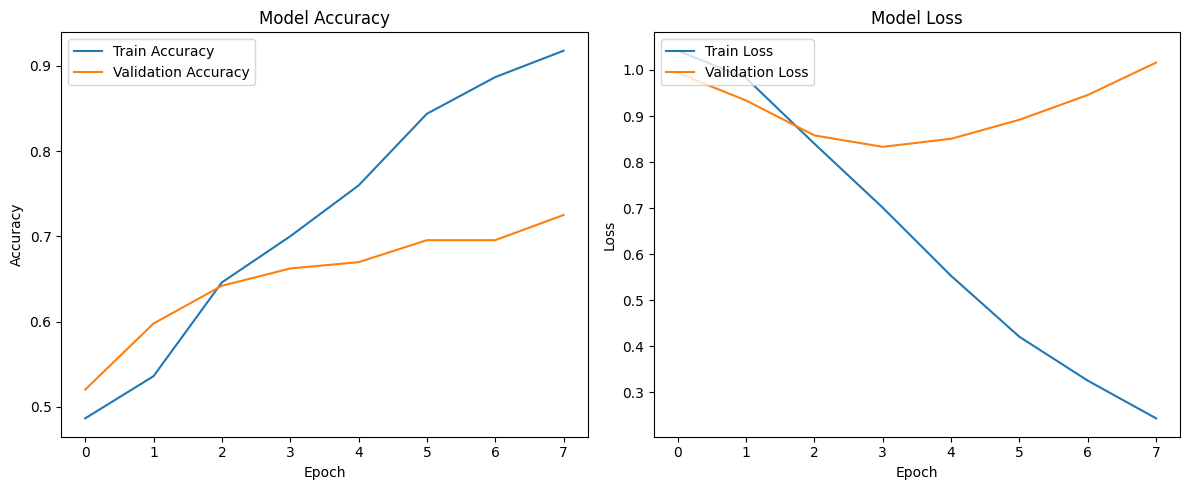

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical


# Train the model and save the history
history = model.fit(X_train, trainy, batch_size=128,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_test, testy))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 336, 100)            │         576,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,105,699 (8.03 MB)

 Trainable params: 701,899 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,403,800 (5.36 MB)


> My seeing this the model is Overfitting so what I will do is I will reduce the Layers and see whether it performs well or not



Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 646ms/step - accuracy: 0.4584 - loss: 1.0716 - val_accuracy: 0.5203 - val_loss: 0.9908
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 537ms/step - accuracy: 0.4955 - loss: 1.0126 - val_accuracy: 0.5295 - val_loss: 0.9740
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 600ms/step - accuracy: 0.5466 - loss: 0.9723 - val_accuracy: 0.5756 - val_loss: 0.9403
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 648ms/step - accuracy: 0.6141 - loss: 0.8991 - val_accuracy: 0.6439 - val_loss: 0.8783
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.6853 - loss: 0.7767 - val_accuracy: 0.6531 - val_loss: 0.8025
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 531ms/step - accuracy: 0.7252 - loss: 0.6453 - val_accuracy: 0.6808 - val_loss: 0.7714
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 637ms/step - accuracy: 0.7950 - loss: 0.5464 - val_accuracy: 0.7048 - val_loss: 0.7464
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 655ms/step - accuracy: 0.8539 - loss: 0.4450 - val_accur

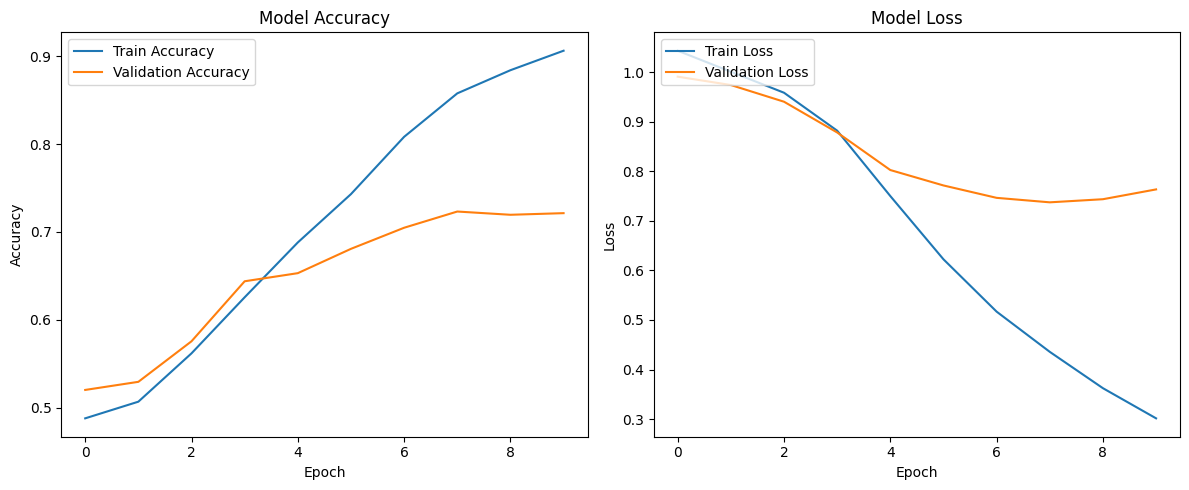

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Assuming your model is defined and compiled
# Train the model and save the history
history = model1.fit(X_train, trainy, batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, testy))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**Evaluating our Model**

In [ ]:
final_pred = model.predict(X_test)
final_pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


array([[1.61707513e-02, 1.19537823e-01, 8.64291430e-01],
       [9.28273003e-05, 3.31806554e-03, 9.96589065e-01],
       [7.27222040e-02, 4.98821348e-01, 4.28456455e-01],
       ...,
       [1.61908206e-03, 4.15437706e-02, 9.56837177e-01],
       [2.26358883e-02, 1.21530816e-01, 8.55833352e-01],
       [9.99336898e-01, 6.49478228e-04, 1.35704449e-05]], dtype=float32)

**Checking the Scores of the trained Model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert one-hot encoded `testy` and `final_pred` back to class labels
testy_labels = np.argmax(testy, axis=1)
final_pred_labels = np.argmax(final_pred, axis=1)

# Now use classification_report, confusion_matrix, and accuracy_score
print(classification_report(testy_labels, final_pred_labels))
print("-" * 100)
print(confusion_matrix(testy_labels, final_pred_labels))
print("-" * 100)
print(accuracy_score(testy_labels, final_pred_labels))


              precision    recall  f1-score   support

           0       0.74      0.63      0.68       147
           1       0.53      0.53      0.53       113
           2       0.79      0.85      0.82       282

    accuracy                           0.73       542
   macro avg       0.69      0.67      0.68       542
weighted avg       0.72      0.73      0.72       542

----------------------------------------------------------------------------------------------------
[[ 93  27  27]
 [ 17  60  36]
 [ 16  26 240]]
----------------------------------------------------------------------------------------------------
0.7250922509225092


> After Certain period the Val_accuracy is not increasing much It might be due to that my data is too small and not have a enough variation so it was defficult for my model to generalize I will go With machine learning Model and try whether Ml model can able to capture the patterns

**ML Models**

In [ ]:
vect = CountVectorizer()

In [ ]:

X_train_dtm = vect.fit_transform(trainx)
X_test_dtm = vect.transform(testx)
X_test_dtm

<542x5735 sparse matrix of type '<class 'numpy.int64'>'
	with 8454 stored elements in Compressed Sparse Row format>

In [ ]:

from sklearn.preprocessing import LabelEncoder

# trainy is a 2D array with one-hot encoded labels
le = LabelEncoder()
trainy = le.fit_transform(trainy.argmax(axis=1))
testy = le.transform(testy.argmax(axis=1))

Now Lets Train with the different Model and check the accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7159
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       147
           1       0.61      0.45      0.52       113
           2       0.74      0.88      0.81       282

    accuracy                           0.72       542
   macro avg       0.69      0.64      0.66       542
weighted avg       0.71      0.72      0.70       542

Confusion Matrix for Logistic Regression:
[[ 88  17  42]
 [ 17  51  45]
 [ 17  16 249]]



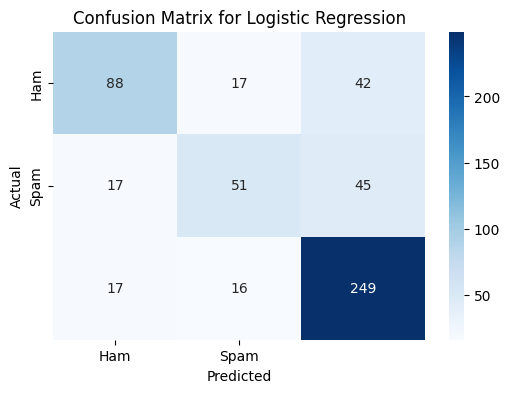

Decision Tree Accuracy: 0.6974
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.59      0.63       147
           1       0.56      0.57      0.56       113
           2       0.75      0.81      0.78       282

    accuracy                           0.70       542
   macro avg       0.67      0.65      0.66       542
weighted avg       0.70      0.70      0.69       542

Confusion Matrix for Decision Tree:
[[ 86  20  41]
 [ 16  64  33]
 [ 23  31 228]]



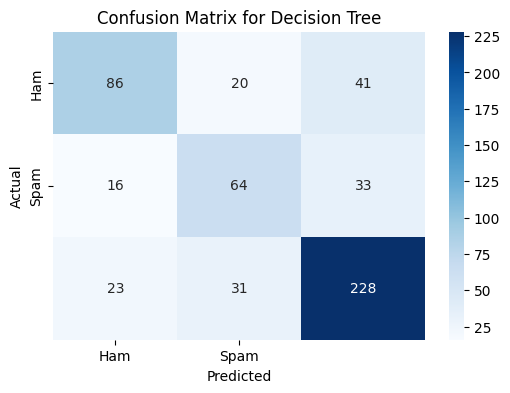

Random Forest Accuracy: 0.7546
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       147
           1       0.72      0.50      0.59       113
           2       0.75      0.92      0.83       282

    accuracy                           0.75       542
   macro avg       0.75      0.68      0.71       542
weighted avg       0.76      0.75      0.74       542

Confusion Matrix for Random Forest:
[[ 93  12  42]
 [ 12  56  45]
 [ 12  10 260]]



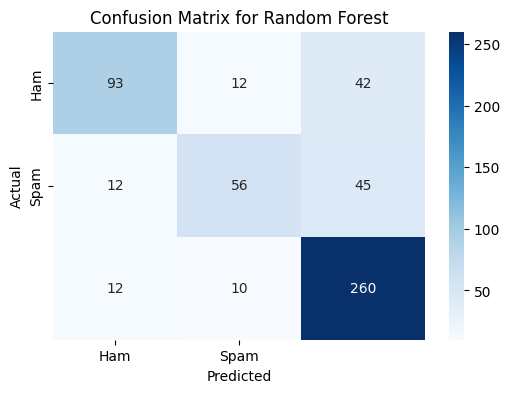

K-Nearest Neighbors Accuracy: 0.5609
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.51      0.20      0.29       147
           1       0.40      0.29      0.34       113
           2       0.60      0.85      0.71       282

    accuracy                           0.56       542
   macro avg       0.50      0.45      0.44       542
weighted avg       0.53      0.56      0.52       542

Confusion Matrix for K-Nearest Neighbors:
[[ 30  28  89]
 [ 10  33  70]
 [ 19  22 241]]



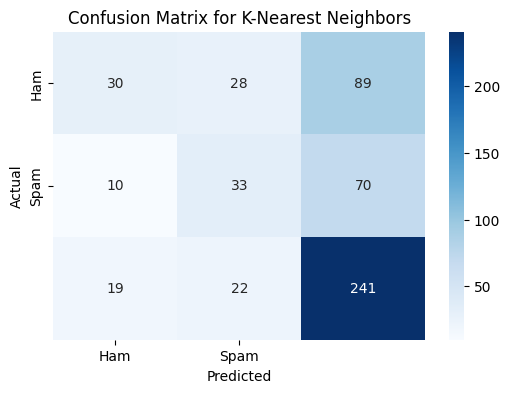

Naive Bayes Accuracy: 0.7103
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       147
           1       0.59      0.39      0.47       113
           2       0.73      0.90      0.81       282

    accuracy                           0.71       542
   macro avg       0.68      0.63      0.64       542
weighted avg       0.70      0.71      0.69       542

Confusion Matrix for Naive Bayes:
[[ 87  21  39]
 [ 15  44  54]
 [ 18  10 254]]



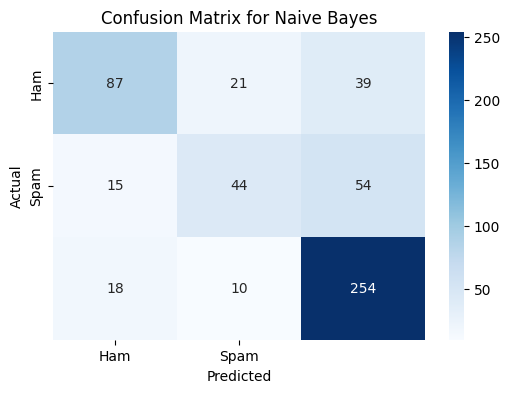


Summary of Accuracies:
Logistic Regression: 0.7159
Decision Tree: 0.6974
Random Forest: 0.7546
K-Nearest Neighbors: 0.5609
Naive Bayes: 0.7103


In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
}

# Dictionary to store accuracies and confusion matrices of each model
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_dtm, trainy)

    # Predict on the test data
    y_pred = model.predict(X_test_dtm)

    # Calculate the accuracy
    accuracy = accuracy_score(testy, y_pred)

    # Store accuracy and predictions in the results dictionary
    results[name] = {
        'accuracy': accuracy,
        'y_pred': y_pred,
    }

    # Print the accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

    # Print classification report
    print(f'Classification Report for {name}:\n{classification_report(testy, y_pred)}')

    # Generate confusion matrix
    cm = confusion_matrix(testy, y_pred)
    print(f'Confusion Matrix for {name}:\n{cm}\n')

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Optional: Print all accuracies together
print("\nSummary of Accuracies:")
for model_name, result in results.items():
    print(f'{model_name}: {result["accuracy"]:.4f}')




> Conclusion: The f1- Score of Class 2 is much higher when compare to the other two class since the class 2 have a more data Expecially in text classification kind of task need a more data to get more accuracy and generalize well Still I can able to increase the accuracy By imalancing, Cross validataion and throung Early stoping(neural Net) But I have Taken this dataset for Practiing the Text cleanin and the Taining and Flow of Training the Neural Network so I stop Here

